In [1]:
import os
import warnings

os.environ["TOKENIZERS_PARALLELISM"] = "false"
print("‚úì TOKENIZERS_PARALLELISM configurado a 'false' para evitar warnings")

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="transformers")

print("‚úì Configuraci√≥n de warnings completada")

‚úì TOKENIZERS_PARALLELISM configurado a 'false' para evitar warnings
‚úì Configuraci√≥n de warnings completada


# Modelado de T√≥picos con FASTopic

Este notebook implementa un an√°lisis de t√≥picos usando FASTopic sobre las opiniones tur√≠sticas clasificadas. Utiliza LangChain con GPT-4o-mini para asignar nombres sem√°nticamente coherentes a los t√≥picos identificados y compara resultados con BERTopic.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import sys
from dotenv import load_dotenv

sys.path.append('../scripts')

from topicos import (
    configurar_clasificador_topicos, 
    configurar_fastopic_inteligente,
    LimpiadorTextoMejorado, 
    mostrar_ejemplos_limpieza
)

from topicos.utils_topicos import (
    procesar_topicos_fastopic,
    obtener_asignaciones_topicos_fastopic,
    visualizar_distribucion_topicos_fastopic,
    mostrar_ejemplos_por_topico_fastopic,
    generar_reporte_fastopic
)

load_dotenv()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

‚úì Modelo spaCy espa√±ol cargado
‚úì Modelo spaCy ingl√©s cargado
‚úì Modelo spaCy ingl√©s cargado
‚úì Modelo spaCy portugu√©s cargado
‚úì Modelo spaCy portugu√©s cargado
‚úì Modelo spaCy franc√©s cargado
‚úì Modelo spaCy franc√©s cargado
‚úì Modelo spaCy italiano cargado
Descargando wordnet...
‚úì Modelo spaCy italiano cargado
Descargando wordnet...


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/victorwkey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
clasificador_topicos = configurar_clasificador_topicos()

In [4]:
CIUDAD_ANALIZAR = "Puerto_vallarta"
df = pd.read_csv('../data/processed/dataset_opiniones_analisis.csv')

if 'TopicoConFASTopic' not in df.columns:
    df['TopicoConFASTopic'] = np.nan

print(f"Dataset cargado: {df.shape[0]} opiniones")
print(f"Distribuci√≥n total por ciudad:")
print(df['Ciudad'].value_counts())

df_ciudad = df[df['Ciudad'] == CIUDAD_ANALIZAR].copy()

columna_texto = 'TituloReviewLimpio'

texts = df_ciudad[columna_texto].dropna().tolist()

Dataset cargado: 2464 opiniones
Distribuci√≥n total por ciudad:
Ciudad
Puebla             500
Mazatlan           500
Puerto_vallarta    491
Cdmx               490
Cancun             483
Name: count, dtype: int64


In [5]:
columna_limpia = "TituloReviewLimpio"

if columna_limpia not in df.columns:
    limpiador = LimpiadorTextoMejorado(idiomas=['spanish', 'english'])
    
    df = limpiador.limpiar_dataframe(
        df,
        columna_texto='TituloReview',
        nombre_columna_limpia=columna_limpia,
        aplicar_lematizacion=True,
        min_longitud_palabra=2,
        max_palabras=None
    )
    
    df.to_csv('../data/processed/dataset_opiniones_analisis.csv', index=False)

df_ciudad = df[df['Ciudad'] == CIUDAD_ANALIZAR].copy()
texts = df_ciudad[columna_texto].dropna().tolist()

In [6]:
topic_model, reporte_optimizacion = configurar_fastopic_inteligente(texts)
    
print("ü§ñ Configuraci√≥n autom√°tica de FASTopic completada")
print(reporte_optimizacion)

2025-09-19 14:02:55,734 - FASTopic - use device: cpu


ü§ñ Configuraci√≥n autom√°tica de FASTopic completada

üìä CONFIGURACI√ìN AUTOM√ÅTICA DE FASTOPIC

üìà An√°lisis del Corpus:
  üìÑ Documentos: 491
  üìù Palabras promedio por doc: 58.9
  üî§ Vocabulario √∫nico: 5,020

üéØ Configuraci√≥n:
  üè∑Ô∏è N√∫mero de t√≥picos: 10
  üìö Tama√±o vocabulario: 5,020
  üåç Modelo embeddings: paraphrase-multilingual-MiniLM-L12-v2
  üîß Tokenizer: Multiidioma (ES, EN, PT, FR, IT)



In [7]:
print("\nüöÄ Entrenando modelo FASTopic...")
inicio_entrenamiento = time.time()

top_words, doc_topic_dist = topic_model.fit_transform(texts)

tiempo_entrenamiento = time.time() - inicio_entrenamiento
print(f"‚úÖ Entrenamiento completado en {tiempo_entrenamiento:.2f} segundos")

2025-09-19 14:02:55,753 - FASTopic - First fit the model.



üöÄ Entrenando modelo FASTopic...


parsing texts: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 491/491 [00:08<00:00, 56.40it/s]
2025-09-19 14:03:17,694 - TopMost - Real vocab size: 684
2025-09-19 14:03:17,694 - TopMost - Real training size: 491 	 avg length: 16.379
parsing texts: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 491/491 [00:08<00:00, 56.40it/s]
2025-09-19 14:03:17,694 - TopMost - Real vocab size: 684
2025-09-19 14:03:17,694 - TopMost - Real training size: 491 	 avg length: 16.379


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Training FASTopic:   4%|‚ñç         | 8/200 [00:00<00:07, 26.76it/s]2025-09-19 14:03:30,217 - FASTopic - Epoch: 010 loss: 118.883
2025-09-19 14:03:30,217 - FASTopic - Epoch: 010 loss: 118.883
Training FASTopic:  19%|‚ñà‚ñâ        | 38/200 [00:01<00:08, 18.83it/s]2025-09-19 14:03:31,764 - FASTopic - Epoch: 040 loss: 105.791
2025-09-19 14:03:31,764 - FASTopic - Epoch: 040 loss: 105.791
Training FASTopic:  30%|‚ñà‚ñà‚ñâ       | 59/200 [00:02<00:06, 20.32it/s]2025-09-19 14:03:32,728 - FASTopic - Epoch: 060 loss: 102.966
2025-09-19 14:03:32,728 - FASTopic - Epoch: 060 loss: 102.966
Training FASTopic:  34%|‚ñà‚ñà‚ñà‚ñç      | 68/200 [00:03<00:06, 21.29it/s]2025-09-19 14:03:33,176 - FASTopic - Epoch: 070 loss: 102.042
2025-09-19 14:03:33,176 - FASTopic - Epoch: 070 loss: 102.042
Training FASTopic:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89/200 [00:04<00:05, 21.54it/s]2025-09-19 14:03:34,088 - FASTopic - Epoch: 090 loss: 100.578
2025-09-19 14:03:34,088 - FASTopic - Epoch: 090 loss: 100.578
Training FASTopi

Topic 0: caminata subir cima escaleras subida vista vale pena manana ejercicio empinada cruz vistas mirador colina
Topic 1: uber chairs souvenirs basura dinero encontre locals ropa deja rent selling razon estadounidenses friendly little
Topic 2: guias equipo amables atentos servicio experiencia tirolesas super genial recomendado atencion gracias personal excelente divertido
Topic 3: hermoso encanta gente destino esculturas viendo obligada grupo pasear voladores vibrante lugar visita turistico viajes
Topic 4: church iglesia corona misa religioso edificio inside guadalupe senora parroquia antigua iglesias altar torre arquitectura
Topic 5: ambiente pancho san ciudad zona romantica tiendas restaurantes calles sayulita mexicana pintoresco callejeros caros encontrara
Topic 6: playas playa muertos tranquilo muelle vendiendo deportes waves limpia arena tranquila surfear olas lgbtq gemelas
Topic 7: bay water great day place restaurants beach beautiful saw time visit amazing wonderful whale whal

In [8]:
topic_info = procesar_topicos_fastopic(topic_model, doc_topic_dist, top_words)

topic_names = {}
for _, row in topic_info.iterrows():
    topic_id = row['Topic']
    keywords = row['Keywords']
    
    if keywords and keywords not in ["Sin palabras", "Error en procesamiento"]:
        resultado = clasificador_topicos.invoke({"keywords": keywords})
        topic_names[topic_id] = resultado.nombre_topico
        print(f"T√≥pico {topic_id}: {topic_names[topic_id]}")
    else:
        topic_names[topic_id] = f"T√≥pico {topic_id}"

topic_info['Name'] = topic_info['Topic'].map(topic_names)

T√≥pico 0: Caminatas con vistas impresionantes
T√≥pico 1: Experiencia local y compras
T√≥pico 1: Experiencia local y compras
T√≥pico 2: Atenci√≥n y Servicio Amable
T√≥pico 2: Atenci√≥n y Servicio Amable
T√≥pico 3: Experiencias culturales impresionantes
T√≥pico 3: Experiencias culturales impresionantes
T√≥pico 4: Experiencias religiosas y culturales
T√≥pico 4: Experiencias religiosas y culturales
T√≥pico 5: Ambiente Rom√°ntico Urbano
T√≥pico 5: Ambiente Rom√°ntico Urbano
T√≥pico 6: Experiencias en playas tranquilas
T√≥pico 6: Experiencias en playas tranquilas
T√≥pico 7: Playas y Restaurantes Bellos
T√≥pico 7: Playas y Restaurantes Bellos
T√≥pico 8: Experiencias Acu√°ticas Naturales
T√≥pico 8: Experiencias Acu√°ticas Naturales
T√≥pico 9: Experiencias Nocturnas Acu√°ticas
T√≥pico 9: Experiencias Nocturnas Acu√°ticas


In [9]:
# Obtener asignaciones de t√≥picos para documentos
topic_assignments, topic_names_assigned, topic_probabilities = obtener_asignaciones_topicos_fastopic(
    doc_topic_dist, 
    topic_names, 
    threshold=0.1
)

# Procesar solo datos de la ciudad seleccionada
df_con_topicos = df_ciudad.dropna(subset=[columna_texto]).copy()
df_con_topicos['Topico'] = topic_assignments
df_con_topicos['Topico_Nombre'] = topic_names_assigned
df_con_topicos['Probabilidad_Topico'] = topic_probabilities

# Verificar si la ciudad ya ten√≠a resultados previos
indices_ciudad = df_con_topicos.index
opiniones_previas = df.loc[indices_ciudad, 'TopicoConFASTopic'].notna().sum()

if opiniones_previas > 0:
    print(f"üîÑ SOBRESCRIBIENDO resultados previos para {CIUDAD_ANALIZAR}:")
    print(f"   üìù Opiniones con t√≥picos previos: {opiniones_previas}")
    print(f"   üÜï Nuevas asignaciones de t√≥picos: {len(df_con_topicos)}")
else:
    print(f"üÜï PRIMERA VEZ procesando {CIUDAD_ANALIZAR}:")
    print(f"   üìù Nuevas asignaciones de t√≥picos: {len(df_con_topicos)}")

# Actualizar el dataset original con los t√≥picos de la ciudad analizada
df.loc[indices_ciudad, 'TopicoConFASTopic'] = df_con_topicos['Topico_Nombre']

print(f"\n‚úÖ Actualizaci√≥n completada para {CIUDAD_ANALIZAR}")
print(f"Distribuci√≥n de t√≥picos en {CIUDAD_ANALIZAR}:")
topico_counts = df_con_topicos['Topico_Nombre'].value_counts()
print(topico_counts)

print(f"\nPorcentaje de opiniones por t√≥pico en {CIUDAD_ANALIZAR}:")
topico_pct = (topico_counts / len(df_con_topicos) * 100).round(2)
for topico, pct in topico_pct.items():
    print(f"{topico}: {pct}%")

print(f"\nEstado actualizaci√≥n dataset completo:")
print(f"Total opiniones: {len(df)}")
print(f"Opiniones con t√≥pico FASTopic asignado: {df['TopicoConFASTopic'].notna().sum()}")
print(f"Opiniones pendientes: {df['TopicoConFASTopic'].isna().sum()}")

üîÑ SOBRESCRIBIENDO resultados previos para Puerto_vallarta:
   üìù Opiniones con t√≥picos previos: 491
   üÜï Nuevas asignaciones de t√≥picos: 491

‚úÖ Actualizaci√≥n completada para Puerto_vallarta
Distribuci√≥n de t√≥picos en Puerto_vallarta:
Topico_Nombre
Experiencias en playas tranquilas         67
Atenci√≥n y Servicio Amable                61
Experiencias religiosas y culturales      57
Experiencias Nocturnas Acu√°ticas          48
Playas y Restaurantes Bellos              48
Experiencias culturales impresionantes    46
Caminatas con vistas impresionantes       45
Experiencia local y compras               45
Experiencias Acu√°ticas Naturales          39
Ambiente Rom√°ntico Urbano                 35
Name: count, dtype: int64

Porcentaje de opiniones por t√≥pico en Puerto_vallarta:
Experiencias en playas tranquilas: 13.65%
Atenci√≥n y Servicio Amable: 12.42%
Experiencias religiosas y culturales: 11.61%
Experiencias Nocturnas Acu√°ticas: 9.78%
Playas y Restaurantes Bellos: 9.78%


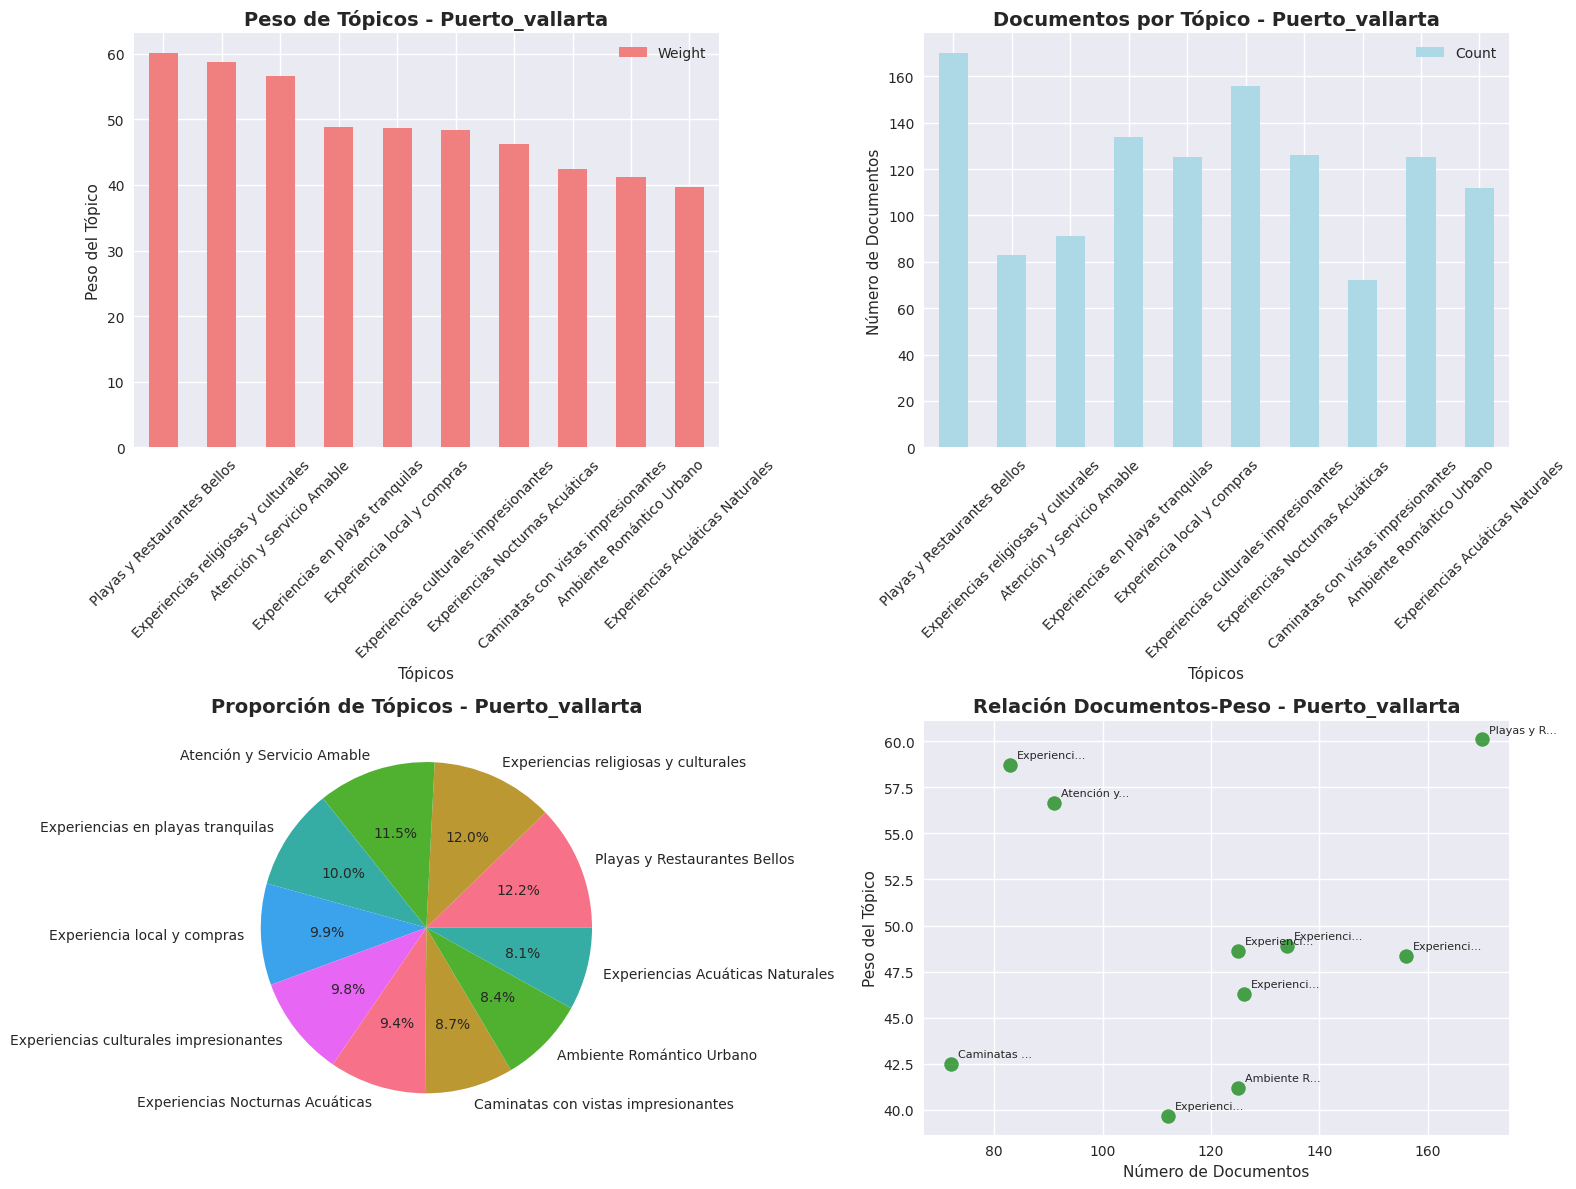

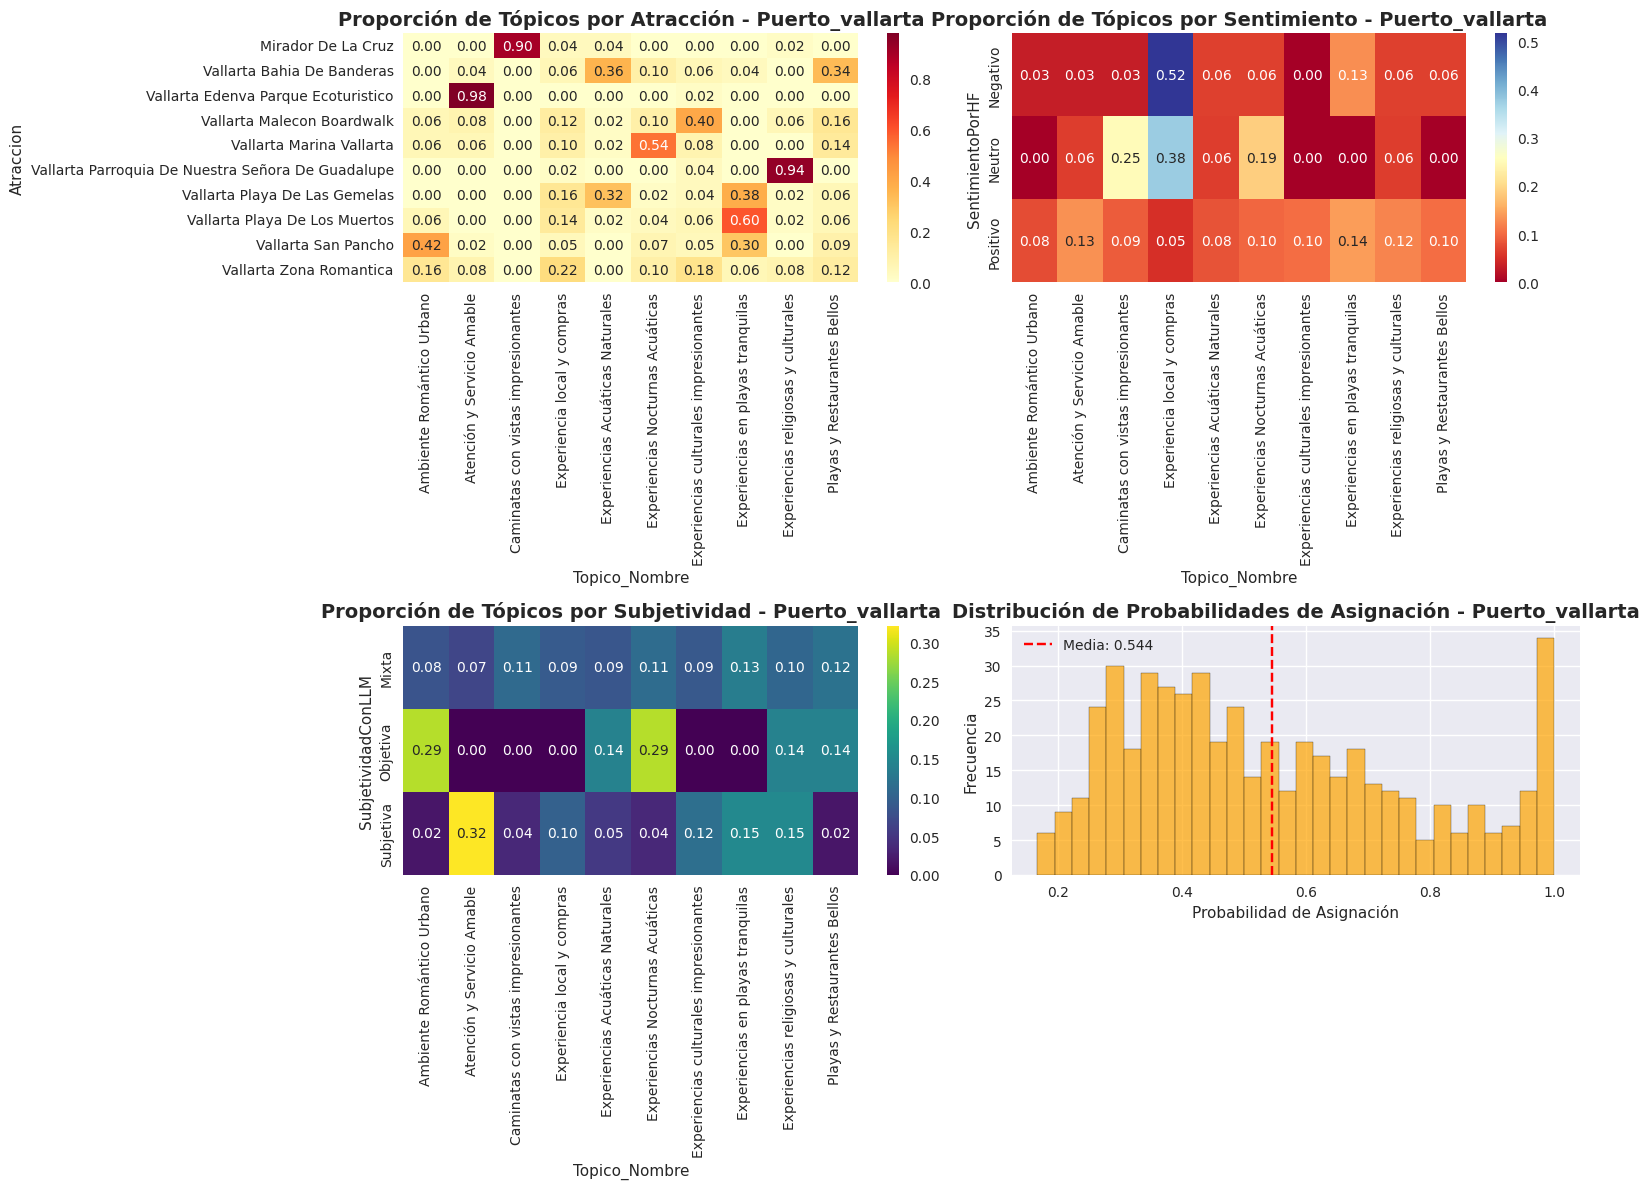

In [10]:
# Visualizaciones principales de FASTopic
visualizar_distribucion_topicos_fastopic(topic_info, CIUDAD_ANALIZAR, top_n=10)

# Comparaci√≥n con otras variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gr√°fico 1: Distribuci√≥n por atracci√≥n en la ciudad
if len(df_con_topicos['Atraccion'].unique()) > 1:
    atraccion_topico = pd.crosstab(df_con_topicos['Atraccion'], df_con_topicos['Topico_Nombre'])
    atraccion_topico_norm = atraccion_topico.div(atraccion_topico.sum(axis=1), axis=0)
    sns.heatmap(atraccion_topico_norm, annot=True, fmt='.2f', ax=axes[0,0], cmap='YlOrRd')
    axes[0,0].set_title(f'Proporci√≥n de T√≥picos por Atracci√≥n - {CIUDAD_ANALIZAR}', fontsize=14, fontweight='bold')
else:
    axes[0,0].text(0.5, 0.5, f'Solo una atracci√≥n en {CIUDAD_ANALIZAR}', ha='center', va='center', transform=axes[0,0].transAxes)
    axes[0,0].set_title(f'Distribuci√≥n por Atracci√≥n - {CIUDAD_ANALIZAR}', fontsize=14, fontweight='bold')

# Gr√°fico 2: T√≥picos por sentimiento
if 'SentimientoPorHF' in df_con_topicos.columns:
    sentimiento_topico = pd.crosstab(df_con_topicos['SentimientoPorHF'], df_con_topicos['Topico_Nombre'])
    sentimiento_topico_norm = sentimiento_topico.div(sentimiento_topico.sum(axis=1), axis=0)
    sns.heatmap(sentimiento_topico_norm, annot=True, fmt='.2f', ax=axes[0,1], cmap='RdYlBu')
    axes[0,1].set_title(f'Proporci√≥n de T√≥picos por Sentimiento - {CIUDAD_ANALIZAR}', fontsize=14, fontweight='bold')

# Gr√°fico 3: T√≥picos por subjetividad
if 'SubjetividadConLLM' in df_con_topicos.columns:
    subjetividad_topico = pd.crosstab(df_con_topicos['SubjetividadConLLM'], df_con_topicos['Topico_Nombre'])
    subjetividad_topico_norm = subjetividad_topico.div(subjetividad_topico.sum(axis=1), axis=0)
    sns.heatmap(subjetividad_topico_norm, annot=True, fmt='.2f', ax=axes[1,0], cmap='viridis')
    axes[1,0].set_title(f'Proporci√≥n de T√≥picos por Subjetividad - {CIUDAD_ANALIZAR}', fontsize=14, fontweight='bold')

# Gr√°fico 4: Distribuci√≥n de probabilidades
axes[1,1].hist(df_con_topicos['Probabilidad_Topico'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title(f'Distribuci√≥n de Probabilidades de Asignaci√≥n - {CIUDAD_ANALIZAR}', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Probabilidad de Asignaci√≥n')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].axvline(df_con_topicos['Probabilidad_Topico'].mean(), color='red', linestyle='--', 
                 label=f'Media: {df_con_topicos["Probabilidad_Topico"].mean():.3f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [11]:
# Mostrar ejemplos de opiniones por t√≥pico
mostrar_ejemplos_por_topico_fastopic(
    df_con_topicos, 
    topico_col='Topico_Nombre',
    texto_col='TituloReview',
    n_ejemplos=3,
    top_n_topicos=5
)

üìö EJEMPLOS DE OPINIONES POR T√ìPICO

üè∑Ô∏è 1. Experiencias en playas tranquilas
üìä Total de opiniones: 67
üìù Ejemplos:
   1. M√°s que una playa. Mucho m√°s que una hermosa playa. Restaurantes, tiendas, r√≠os y una hermosa vista ...
   2. Playa divertida y limpia. Playa muy agradable y limpia. Tranquilo y sin mucho ruido. Rodeado de rest...
   3. Lugar emblem√°tico. Es una playa que tiene infinidad de opciones para comer. Los atardeceres ah√≠ son ...
----------------------------------------------------------------------

üè∑Ô∏è 2. Atenci√≥n y Servicio Amable
üìä Total de opiniones: 61
üìù Ejemplos:
   1. D√çA FANT√ÅSTICO. Pasamos un d√≠a incre√≠ble pescando, tambi√©n visitamos la playa Las Animas donde disfr...
   2. Faro bar y parrilla. El faro acaba de abrir con nuevos propietarios. La comida era excelente para el...
   3. Pezlimon mariscos excepcional. Absolutamente genial en todos los sentidos. . . . lindo entorno de pa...
------------------------------------------------

In [12]:
# ===== COMPARACI√ìN TEXTO ORIGINAL VS TEXTO LIMPIO =====
if 'TituloReviewLimpio' in df_con_topicos.columns:
    print(f"üîç Comparaci√≥n de ejemplos - Original vs Limpio ({CIUDAD_ANALIZAR}):")
    print("=" * 80)
    
    # Seleccionar algunos ejemplos para mostrar la diferencia
    ejemplos_muestra = df_con_topicos.sample(n=min(10, len(df_con_topicos)))
    
    for i, (_, row) in enumerate(ejemplos_muestra.iterrows(), 1):
        print(f"\nüìÑ EJEMPLO {i} - T√≥pico: {row['Topico_Nombre']}")
        print(f"üî∏ Original: {row['TituloReview']}")
        print(f"üîπ Limpio:   {row['TituloReviewLimpio']}")
        print(f"üìä Probabilidad: {row['Probabilidad_Topico']:.3f}")
        
        # Calcular estad√≠sticas del ejemplo
        len_orig = len(str(row['TituloReview']))
        len_limpio = len(str(row['TituloReviewLimpio']))
        reduccion = ((len_orig-len_limpio)/len_orig*100) if len_orig > 0 else 0
        print(f"üìâ Reducci√≥n: {len_orig} ‚Üí {len_limpio} caracteres ({reduccion:.1f}%)")
        print("-" * 80)

üîç Comparaci√≥n de ejemplos - Original vs Limpio (Puerto_vallarta):

üìÑ EJEMPLO 1 - T√≥pico: Experiencias en playas tranquilas
üî∏ Original: ¬°Gran playa!. La playa no solo es fabulosa y la arena no es demasiado rocosa ni granulosa, sino que los restaurantes que la bordean son deliciosos, con comidas y bebidas disponibles durante todo el d√≠a, sillas c√≥modas, ideales para ver a la gente pasear por la orilla del agua. A algunas personas les molestan los vendedores ininterrumpidos, pero a nosotros nos encanta hablar con ellos, incluso si no compramos. Si quieres una comida especial, ve a La Palapa, uno de los mejores restaurantes de PV, ah√≠ mismo en la arena. Las cenas all√≠ son fabulosas.
üîπ Limpio:   gran playa la playa no solo es fabulosa y la arena no es demasiado rocosa ni granulosa sino que los restaurantes que la bordean son deliciosos con comidas y bebidas disponibles durante todo el dia sillas comodas ideales para ver a la gente pasear por la orilla del agua a algunas p

In [13]:
# ===== VISUALIZACIONES ESPEC√çFICAS DE FASTOPIC =====

# Generar visualizaci√≥n de t√≥picos
fig_topics = topic_model.visualize_topic(top_n=min(8, len(topic_info)))
fig_topics.update_layout(title=f"Palabras Principales por T√≥pico - {CIUDAD_ANALIZAR}")
fig_topics.show()

# Generar visualizaci√≥n de pesos de t√≥picos
fig_weights = topic_model.visualize_topic_weights(top_n=min(10, len(topic_info)))
fig_weights.update_layout(title=f"Distribuci√≥n de Pesos de T√≥picos - {CIUDAD_ANALIZAR}")
fig_weights.show()

# Generar jerarqu√≠a de t√≥picos si hay suficientes
if len(topic_info) >= 3:
    fig_hierarchy = topic_model.visualize_topic_hierarchy()
    fig_hierarchy.update_layout(title=f"Jerarqu√≠a de T√≥picos - {CIUDAD_ANALIZAR}")
    fig_hierarchy.show()

print(f"\nüìã Resumen del modelado FASTopic:")
print(f"‚úÖ Textos analizados: {len(texts)}")
print(f"üéØ T√≥picos encontrados: {len(topic_info)}")
print(f"‚è±Ô∏è Tiempo de entrenamiento: {tiempo_entrenamiento:.2f}s")
print(f"üìä Probabilidad promedio: {df_con_topicos['Probabilidad_Topico'].mean():.3f}")
print(f"üìà Distribuci√≥n:")
for i, (topico, count) in enumerate(topico_counts.head(5).items()):
    print(f"   {i+1}. {topico}: {count} opiniones ({count/len(df_con_topicos)*100:.1f}%)")


üìã Resumen del modelado FASTopic:
‚úÖ Textos analizados: 491
üéØ T√≥picos encontrados: 10
‚è±Ô∏è Tiempo de entrenamiento: 43.86s
üìä Probabilidad promedio: 0.544
üìà Distribuci√≥n:
   1. Experiencias en playas tranquilas: 67 opiniones (13.6%)
   2. Atenci√≥n y Servicio Amable: 61 opiniones (12.4%)
   3. Experiencias religiosas y culturales: 57 opiniones (11.6%)
   4. Experiencias Nocturnas Acu√°ticas: 48 opiniones (9.8%)
   5. Playas y Restaurantes Bellos: 48 opiniones (9.8%)


üîÑ COMPARACI√ìN FASTopic vs BERTopic en Puerto_vallarta
üìä Opiniones con ambos an√°lisis: 491

üéØ N√öMERO DE T√ìPICOS:
   BERTopic: 7
   FASTopic: 10


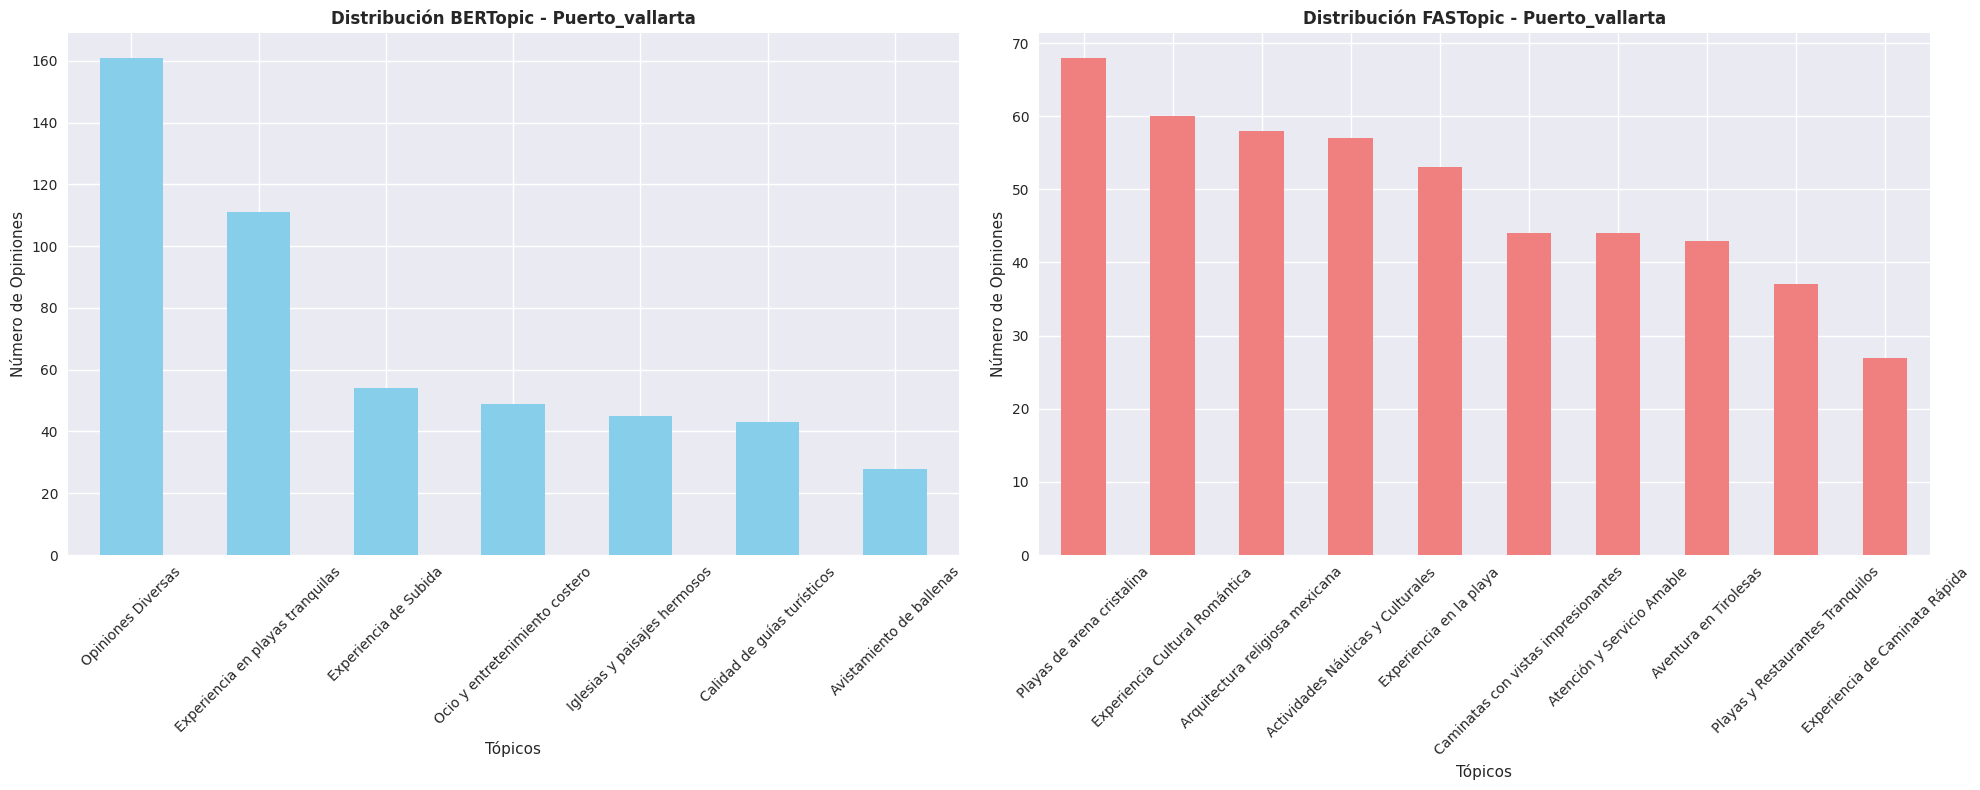


üìà TOP 5 T√ìPICOS POR M√âTODO:

üîµ BERTopic:
   1. Opiniones Diversas: 161 (32.8%)
   2. Experiencia en playas tranquilas: 111 (22.6%)
   3. Experiencia de Subida: 54 (11.0%)
   4. Ocio y entretenimiento costero: 49 (10.0%)
   5. Iglesias y paisajes hermosos: 45 (9.2%)

üî¥ FASTopic:
   1. Playas de arena cristalina: 68 (13.8%)
   2. Experiencia Cultural Rom√°ntica: 60 (12.2%)
   3. Arquitectura religiosa mexicana: 58 (11.8%)
   4. Actividades N√°uticas y Culturales: 57 (11.6%)
   5. Experiencia en la playa: 53 (10.8%)

üí° OBSERVACIONES:
   ‚Ä¢ FASTopic identific√≥ 10 t√≥picos vs 7 de BERTopic
   ‚Ä¢ FASTopic muestra mayor granularidad en la segmentaci√≥n
   ‚Ä¢ Tiempo FASTopic: 43.86s (m√°s r√°pido que BERTopic)


In [14]:
# ===== COMPARACI√ìN CON BERTOPIC =====

if 'TopicoConBERTopic' in df.columns:
    print(f"üîÑ COMPARACI√ìN FASTopic vs BERTopic en {CIUDAD_ANALIZAR}")
    print("=" * 60)
    
    # Filtrar datos de la ciudad con ambos an√°lisis
    df_comparacion = df_ciudad[
        (df_ciudad['TopicoConBERTopic'].notna()) & 
        (df_ciudad['TopicoConFASTopic'].notna())
    ].copy()
    
    if len(df_comparacion) > 0:
        print(f"üìä Opiniones con ambos an√°lisis: {len(df_comparacion)}")
        
        # Comparar n√∫mero de t√≥picos √∫nicos
        topicos_bertopic = df_comparacion['TopicoConBERTopic'].nunique()
        topicos_fastopic = df_comparacion['TopicoConFASTopic'].nunique()
        
        print(f"\nüéØ N√öMERO DE T√ìPICOS:")
        print(f"   BERTopic: {topicos_bertopic}")
        print(f"   FASTopic: {topicos_fastopic}")
        
        # Mostrar distribuciones lado a lado
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        
        # BERTopic
        bertopic_counts = df_comparacion['TopicoConBERTopic'].value_counts().head(10)
        bertopic_counts.plot(kind='bar', ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribuci√≥n BERTopic - {CIUDAD_ANALIZAR}', fontweight='bold')
        axes[0].set_xlabel('T√≥picos')
        axes[0].set_ylabel('N√∫mero de Opiniones')
        axes[0].tick_params(axis='x', rotation=45)
        
        # FASTopic
        fastopic_counts = df_comparacion['TopicoConFASTopic'].value_counts().head(10)
        fastopic_counts.plot(kind='bar', ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Distribuci√≥n FASTopic - {CIUDAD_ANALIZAR}', fontweight='bold')
        axes[1].set_xlabel('T√≥picos')
        axes[1].set_ylabel('N√∫mero de Opiniones')
        axes[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # An√°lisis de concordancia (t√≥picos m√°s frecuentes)
        print(f"\nüìà TOP 5 T√ìPICOS POR M√âTODO:")
        print(f"\nüîµ BERTopic:")
        for i, (topico, count) in enumerate(bertopic_counts.head(5).items(), 1):
            pct = (count / len(df_comparacion) * 100)
            print(f"   {i}. {topico}: {count} ({pct:.1f}%)")
        
        print(f"\nüî¥ FASTopic:")
        for i, (topico, count) in enumerate(fastopic_counts.head(5).items(), 1):
            pct = (count / len(df_comparacion) * 100)
            print(f"   {i}. {topico}: {count} ({pct:.1f}%)")
            
        print(f"\nüí° OBSERVACIONES:")
        print(f"   ‚Ä¢ FASTopic identific√≥ {topicos_fastopic} t√≥picos vs {topicos_bertopic} de BERTopic")
        if topicos_fastopic > topicos_bertopic:
            print(f"   ‚Ä¢ FASTopic muestra mayor granularidad en la segmentaci√≥n")
        elif topicos_fastopic < topicos_bertopic:
            print(f"   ‚Ä¢ FASTopic agrupa conceptos de manera m√°s generalizada")
        else:
            print(f"   ‚Ä¢ Ambos m√©todos identificaron el mismo n√∫mero de t√≥picos")
            
        print(f"   ‚Ä¢ Tiempo FASTopic: {tiempo_entrenamiento:.2f}s (m√°s r√°pido que BERTopic)")
        
    else:
        print(f"‚ö†Ô∏è No hay opiniones de {CIUDAD_ANALIZAR} con ambos an√°lisis completados")
        print(f"   BERTopic: {df_ciudad['TopicoConBERTopic'].notna().sum()} opiniones")
        print(f"   FASTopic: {df_ciudad['TopicoConFASTopic'].notna().sum()} opiniones")
else:
    print(f"‚ÑπÔ∏è No hay an√°lisis previo de BERTopic para comparar")
    print(f"   Ejecuta el notebook 07-modelado-de-topicos-con-bertopic.ipynb primero")

In [15]:
generar_reporte_fastopic(
    topic_info, 
    len(df_con_topicos), 
    CIUDAD_ANALIZAR, 
    tiempo_entrenamiento
)

print("\nüíæ Guardando dataset actualizado...")
df.to_csv('../data/processed/dataset_opiniones_analisis.csv', index=False)

print("\n‚úÖ Dataset actualizado y guardado:")
print(f"üìä Total opiniones: {len(df)}")
print(f"üéØ Ciudad analizada: {CIUDAD_ANALIZAR}")
print(f"‚úÖ Opiniones con FASTopic: {df['TopicoConFASTopic'].notna().sum()}")
print(f"‚è≥ Opiniones pendientes: {df['TopicoConFASTopic'].isna().sum()}")

print(f"\nüìà Estad√≠sticas finales de {CIUDAD_ANALIZAR}:")
print(f"T√≥picos FASTopic: {len(topic_info)}")
print(f"Opiniones analizadas: {len(df_con_topicos)}")
print(f"Tiempo total: {tiempo_entrenamiento:.2f}s")
print(f"Probabilidad promedio: {df_con_topicos['Probabilidad_Topico'].mean():.3f}")

üìã REPORTE COMPLETO - AN√ÅLISIS CON FASTOPIC
üéØ AN√ÅLISIS COMPLETADO:
   üìç Ciudad: Puerto_vallarta
   üìÑ Documentos analizados: 491
   üè∑Ô∏è T√≥picos identificados: 10
   ‚è±Ô∏è Tiempo de entrenamiento: 43.86 segundos

üìä ESTAD√çSTICAS DE T√ìPICOS:
   üéØ T√≥pico m√°s relevante: Playas y Restaurantes Bellos
   üìà Peso m√°ximo: 60.095
   üìâ Peso m√≠nimo: 39.673
   üìä Peso promedio: 49.100

üèÜ TOP 5 T√ìPICOS POR RELEVANCIA:
   1. Playas y Restaurantes Bellos
      üìä Peso: 60.095 | üìÑ Documentos: 170
      üîë Palabras clave: bay, water, great, day, place, restaurants, beach,...
   2. Experiencias religiosas y culturales
      üìä Peso: 58.736 | üìÑ Documentos: 83
      üîë Palabras clave: church, iglesia, corona, misa, religioso, edificio...
   3. Atenci√≥n y Servicio Amable
      üìä Peso: 56.642 | üìÑ Documentos: 91
      üîë Palabras clave: guias, equipo, amables, atentos, servicio, experie...
   4. Experiencias en playas tranquilas
      üìä Peso: 4